<h2><a name="Ubicacion"></a><strong>3. Ubicaciones de la capital</strong></h2>
<p>Ahora que conocemos nuestra galaxia y nos hemos podido abrir paso extendiendo nuestros dominios, llega un punto en el que debemos ubicar aquel sistema que será la <strong>capital</strong> de nuestro <strong>futuro imperio</strong>. El problema se basa en qué sistema o por qué lugar nos vendría bien situar nuestra capital, que esté lo más centrado posible para poder llegar rápidamente a cualquier lugar conquistado o incluso para poder defenderlo fácilemente de cualquier ataque enemigo.</p>
<p>Nos centraremos más en encontrar los sistemas perfectos para asignarles nuestra capital.</p>
<p>Mediante la función <em>mejor_opcion</em> podremos ver los mejores lugares del imperio para colocar una capital.</p>

**DEFINIMOS EL GRAFO CON EL QUE VAMOS A TRABAJAR**

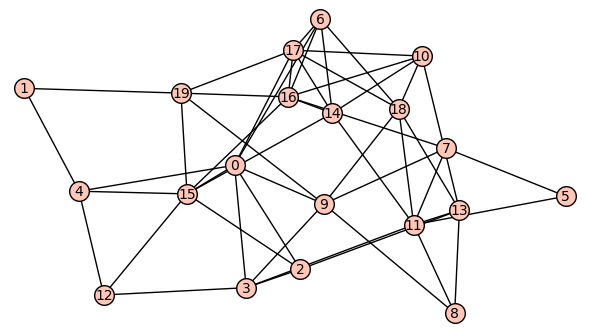

In [1]:
G=graphs.RandomGNP(20,0.2)
while not G.is_connected():
    G=graphs.RandomGNP(20,0.2)
G.plot(figsize=6)

**LÓGICA PARA ABORDAR EL PROBLEMA**

Una manera lógica de averiguar cuales son las mejores opciones y cuales las peores es con el centro y la periferia. Al ser los de la periferia los más dificiles de acceder desde dentro de tu imperio, es lógico que sean la peor opción. Justo lo contrario que pasa con el centro

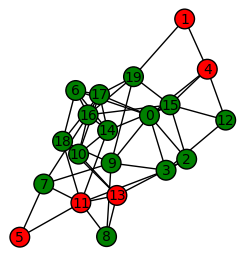

In [2]:
colores={'green':G.center(),'red':G.periphery()}
G.plot(vertex_colors=colores,figsize=4)

**MEJOR SOLUCIÓN**

Como es posible que salgan demasiadas posibilidades, para poder decidir la mejor capital, eliminaremos los nodos de la periferia ya que al ser los más dificiles de acceder, son los que más posibilidades tienen de ser conquistados. Así en caso de ser conquistados asegurarnos que la capital sigue estando en un punto facilmente defendible.

In [3]:
def mejor_opcion(g):
    """
    Encuentra iterativamente el centro de un grafo al eliminar vértices periféricos
    hasta que el tamaño del centro sea igual a 1 o se encuentre un conjunto minimo a escoger

    Parameters:
        - g: Grafo de entrada.

    Returns:
        Un conjunto de vértices que constituyen el centro del grafo.
    """
    
    # Se crea una copia del grafo original para evitar modificar el grafo original
    G = g.copy()
    
    # Se ejecuta un bucle mientras el tamaño del centro del grafo no sea igual a 1, es decir, un unico nodo importante
    while not len(G.center())==1:
        # Se verifica si el conjunto de vértices periféricos es vacío o si el radio es igual al diámetro, para saber si hemos acabado
        if not (len(G.periphery()) == 0 or G.radius() == G.diameter()):
            # En caso afirmativo, se itera sobre los vértices periféricos y se elimina cada uno de ellos
            for v in G.periphery():
                G.delete_vertex(v)
        else:
            # Si no se cumple la condición anterior, se rompe el bucle
            break
    return G.center()

In [4]:
mejor_opcion(G)

[9]